In [176]:
import json
import pandas as pd
import numpy as np
import networkx as nx
import jellyfish
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
from fuzzywuzzy import fuzz

In [3]:
with open('spark_dependency_results.json') as f:
    spark_results = json.load(f)


In [11]:
print(len(spark_results['schemaVersion']))
print(len(spark_results['name']))
print(len(spark_results['variables']))
print(len(spark_results['cells']))

3
29
1106
4313


In [9]:
len(spark_results)
#spark_df = pd.DataFrame(spark_results)

4

In [10]:
spark_results

{'schemaVersion': '1.0',
 'name': 'spark_dependency_results-sdsm',
 'variables': ['C:\\Users\\tanji\\Desktop\\spark-master\\common\\kvstore\\src\\main\\java\\org\\apache\\spark\\util\\kvstore\\ArrayWrappers.java',
  'C:\\Users\\tanji\\Desktop\\spark-master\\common\\kvstore\\src\\main\\java\\org\\apache\\spark\\util\\kvstore\\InMemoryStore.java',
  'C:\\Users\\tanji\\Desktop\\spark-master\\common\\kvstore\\src\\main\\java\\org\\apache\\spark\\util\\kvstore\\KVIndex.java',
  'C:\\Users\\tanji\\Desktop\\spark-master\\common\\kvstore\\src\\main\\java\\org\\apache\\spark\\util\\kvstore\\KVStore.java',
  'C:\\Users\\tanji\\Desktop\\spark-master\\common\\kvstore\\src\\main\\java\\org\\apache\\spark\\util\\kvstore\\KVStoreIterator.java',
  'C:\\Users\\tanji\\Desktop\\spark-master\\common\\kvstore\\src\\main\\java\\org\\apache\\spark\\util\\kvstore\\KVStoreSerializer.java',
  'C:\\Users\\tanji\\Desktop\\spark-master\\common\\kvstore\\src\\main\\java\\org\\apache\\spark\\util\\kvstore\\KVStoreVi

In [16]:
index  = 0
var_array = []
for value in spark_results['variables']:
    var_array.append([index, value])
    #print(index, value)
    index += 1

In [19]:
var_df = pd.DataFrame(var_array)
var_df.columns = ['index_val', 'name']
var_df.head()

,index_val,name
0,0,C:\Users\tanji\Desktop\spark-master\common\kvs...
1,1,C:\Users\tanji\Desktop\spark-master\common\kvs...
2,2,C:\Users\tanji\Desktop\spark-master\common\kvs...
3,3,C:\Users\tanji\Desktop\spark-master\common\kvs...
4,4,C:\Users\tanji\Desktop\spark-master\common\kvs...


In [48]:
feature_list = {}
feature_index = 2
for element in spark_results['cells']:
    #print(element)
    try:
        for a in element['values']:
            if a not in feature_list:
                feature_list[a] = feature_index
                feature_index += 1
            #print(a['Call'])
        
        
    except:
        pass

In [49]:
feature_list

{'Cast': 2,
 'Call': 3,
 'Return': 4,
 'Use': 5,
 'Create': 6,
 'Parameter': 7,
 'Contain': 8,
 'Import': 9,
 'Extend': 10,
 'Annotation': 11,
 'Implement': 12,
 'Throw': 13}

In [60]:
feature_arr = []
for element in spark_results['cells']:
    #print(array)
    array = [0] * (len(feature_list) + 2)
    values = dict(element['values'])
    #print(element)
    array[0] = element['src']
    array[1] = element['dest']
    for feature in feature_list:
        try:
            value = values[feature]
            array[feature_list[feature]] = value
        except:
            pass
    #print(array)
    feature_arr.append(array)

In [61]:
values['Import']
feature_list['Cast']

2

In [63]:
feature_df = pd.DataFrame(feature_arr)
col_names = ['src', 'dest']
for element in feature_list:
    col_names.append(element)
feature_df.columns = col_names
feature_df.head()

,src,dest,Cast,Call,Return,Use,Create,Parameter,Contain,Import,Extend,Annotation,Implement,Throw
0,796,834,1.0,9.0,1.0,8.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,522,498,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,596,589,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,11,178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,772,909,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
feature_df['sum'] = feature_df.sum(axis=1) - feature_df['src'] - feature_df['dest']

In [71]:
feature_df.head()

,src,dest,Cast,Call,Return,Use,Create,Parameter,Contain,Import,Extend,Annotation,Implement,Throw,sum
0,796,834,1.0,9.0,1.0,8.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,24.0
1,522,498,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0
2,596,589,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
3,11,178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0
4,772,909,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [73]:
for index, row in feature_df.iterrows():
    print(index, row['src'])

0 796.0
1 522.0
2 596.0
3 11.0
4 772.0
5 591.0
6 796.0
7 113.0
8 113.0
9 636.0
10 950.0
11 591.0
12 813.0
13 57.0
14 190.0
15 527.0
16 144.0
17 1098.0
18 1098.0
19 598.0
20 813.0
21 598.0
22 75.0
23 650.0
24 631.0
25 596.0
26 955.0
27 459.0
28 596.0
29 352.0
30 914.0
31 914.0
32 914.0
33 914.0
34 914.0
35 914.0
36 914.0
37 914.0
38 914.0
39 914.0
40 791.0
41 334.0
42 113.0
43 888.0
44 1049.0
45 371.0
46 82.0
47 82.0
48 441.0
49 82.0
50 82.0
51 955.0
52 82.0
53 727.0
54 680.0
55 818.0
56 113.0
57 113.0
58 113.0
59 1098.0
60 441.0
61 741.0
62 1067.0
63 1067.0
64 82.0
65 687.0
66 1067.0
67 1067.0
68 1067.0
69 1067.0
70 259.0
71 570.0
72 82.0
73 82.0
74 82.0
75 82.0
76 82.0
77 82.0
78 259.0
79 82.0
80 82.0
81 82.0
82 82.0
83 723.0
84 82.0
85 82.0
86 82.0
87 884.0
88 704.0
89 704.0
90 468.0
91 704.0
92 135.0
93 394.0
94 25.0
95 652.0
96 869.0
97 394.0
98 869.0
99 518.0
100 1048.0
101 946.0
102 1048.0
103 82.0
104 1048.0
105 82.0
106 82.0
107 82.0
108 82.0
109 82.0
110 884.0
111 385.0
112 46

916 158.0
917 740.0
918 740.0
919 303.0
920 625.0
921 618.0
922 120.0
923 120.0
924 120.0
925 120.0
926 792.0
927 740.0
928 1031.0
929 593.0
930 740.0
931 593.0
932 740.0
933 740.0
934 158.0
935 158.0
936 865.0
937 593.0
938 103.0
939 103.0
940 103.0
941 1105.0
942 67.0
943 1058.0
944 1058.0
945 1058.0
946 1058.0
947 851.0
948 1058.0
949 120.0
950 67.0
951 1058.0
952 1058.0
953 1058.0
954 745.0
955 914.0
956 1058.0
957 745.0
958 1058.0
959 745.0
960 745.0
961 914.0
962 745.0
963 745.0
964 914.0
965 745.0
966 745.0
967 973.0
968 745.0
969 915.0
970 915.0
971 915.0
972 915.0
973 851.0
974 1058.0
975 914.0
976 1058.0
977 915.0
978 1058.0
979 745.0
980 745.0
981 120.0
982 1058.0
983 914.0
984 745.0
985 850.0
986 745.0
987 914.0
988 914.0
989 1044.0
990 914.0
991 914.0
992 914.0
993 914.0
994 914.0
995 914.0
996 914.0
997 914.0
998 120.0
999 915.0
1000 915.0
1001 915.0
1002 851.0
1003 909.0
1004 915.0
1005 915.0
1006 915.0
1007 915.0
1008 915.0
1009 67.0
1010 851.0
1011 851.0
1012 1058.0
10

2485 1041.0
2486 687.0
2487 766.0
2488 256.0
2489 934.0
2490 41.0
2491 687.0
2492 687.0
2493 41.0
2494 111.0
2495 441.0
2496 1062.0
2497 104.0
2498 1062.0
2499 988.0
2500 48.0
2501 988.0
2502 48.0
2503 880.0
2504 687.0
2505 687.0
2506 687.0
2507 687.0
2508 687.0
2509 687.0
2510 104.0
2511 1046.0
2512 104.0
2513 1046.0
2514 1046.0
2515 586.0
2516 586.0
2517 154.0
2518 586.0
2519 876.0
2520 154.0
2521 154.0
2522 154.0
2523 256.0
2524 66.0
2525 534.0
2526 1046.0
2527 378.0
2528 1046.0
2529 1046.0
2530 1046.0
2531 256.0
2532 1046.0
2533 1046.0
2534 1046.0
2535 834.0
2536 1035.0
2537 894.0
2538 1046.0
2539 247.0
2540 1046.0
2541 104.0
2542 894.0
2543 1046.0
2544 1046.0
2545 104.0
2546 1062.0
2547 441.0
2548 66.0
2549 66.0
2550 441.0
2551 118.0
2552 59.0
2553 111.0
2554 111.0
2555 737.0
2556 132.0
2557 737.0
2558 132.0
2559 871.0
2560 871.0
2561 100.0
2562 132.0
2563 111.0
2564 734.0
2565 111.0
2566 624.0
2567 624.0
2568 111.0
2569 624.0
2570 247.0
2571 111.0
2572 589.0
2573 111.0
2574 111.0

3712 738.0
3713 1105.0
3714 738.0
3715 1105.0
3716 1105.0
3717 1105.0
3718 738.0
3719 1105.0
3720 738.0
3721 1105.0
3722 1105.0
3723 771.0
3724 1019.0
3725 1105.0
3726 1105.0
3727 961.0
3728 105.0
3729 105.0
3730 1066.0
3731 663.0
3732 1066.0
3733 1025.0
3734 105.0
3735 105.0
3736 105.0
3737 65.0
3738 65.0
3739 105.0
3740 105.0
3741 105.0
3742 105.0
3743 105.0
3744 1023.0
3745 82.0
3746 736.0
3747 65.0
3748 457.0
3749 457.0
3750 917.0
3751 965.0
3752 812.0
3753 1066.0
3754 1066.0
3755 1066.0
3756 1066.0
3757 729.0
3758 1066.0
3759 1066.0
3760 65.0
3761 1066.0
3762 1066.0
3763 563.0
3764 1066.0
3765 166.0
3766 1066.0
3767 665.0
3768 1068.0
3769 166.0
3770 909.0
3771 1068.0
3772 1066.0
3773 1066.0
3774 1066.0
3775 1066.0
3776 1066.0
3777 1066.0
3778 1066.0
3779 612.0
3780 1066.0
3781 285.0
3782 1066.0
3783 1066.0
3784 65.0
3785 690.0
3786 690.0
3787 496.0
3788 690.0
3789 511.0
3790 690.0
3791 520.0
3792 738.0
3793 19.0
3794 571.0
3795 328.0
3796 910.0
3797 117.0
3798 117.0
3799 604.0
380

In [75]:
G = nx.Graph()
for index, row in feature_df.iterrows():
    G.add_edge(row['src'], row['dest'], weight=row['sum'])

In [97]:
len(G.nodes)

979

In [77]:
adj_mat = nx.adjacency_matrix(G)

In [84]:
adj_mat_df = pd.DataFrame(adj_mat.todense())
print(adj_mat_df.shape)
adj_mat_df.head()

(979, 979)


,0,1,2,3,4,5,6,7,8,9,...,969,970,971,972,973,974,975,976,977,978
0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,4.0,7.0
4,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


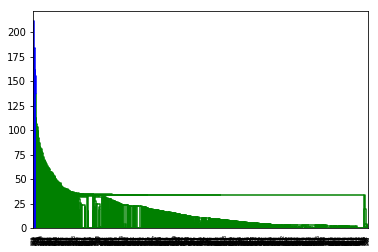

<Figure size 1440x1440 with 0 Axes>

In [95]:
linked = linkage(adj_mat_df.values, 'single')
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)

plt.figure(figsize=(20, 20))  
plt.show()

In [137]:
from sklearn.cluster import AgglomerativeClustering

input_n_clusters = len(G.nodes)
main_cluster_arr = []
col_counter = 0
while input_n_clusters > 16:
    print(input_n_clusters)
    cluster = AgglomerativeClustering(n_clusters=input_n_clusters, affinity='euclidean', linkage='ward')
    cluster_result = cluster.fit_predict(adj_mat_df.values)
    
    cluster_result_arr = []
    cluster_counter = 0
    for element in cluster_result:
        #print(element)
        cluster_result_arr.append(element)
    
    main_cluster_arr.append(cluster_result_arr)
    input_n_clusters = input_n_clusters // 2
    col_counter += 1



979


C:\ProgramData\Anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:878: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


489


C:\ProgramData\Anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:878: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


244


C:\ProgramData\Anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:878: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


122


C:\ProgramData\Anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:878: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


61


C:\ProgramData\Anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:878: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


30


C:\ProgramData\Anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:878: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


In [127]:
cluster_df = pd.DataFrame(main_cluster_arr)



In [128]:
# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF = test[test.duplicated()]
 
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are :
Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5]
Index: []


In [131]:
cluster_df.head()

,0,1,2,3,4,5,6,7,8,9,...,969,970,971,972,973,974,975,976,977,978
0,978,639,787,603,557,839,693,789,871,813,...,57,28,12,5,4,13,6,1,2,0
1,53,319,47,301,278,419,0,394,435,406,...,221,221,50,50,22,221,221,0,50,92
2,54,159,6,150,13,209,1,0,1,50,...,1,1,43,43,6,1,1,1,43,43
3,54,79,56,2,57,104,2,2,2,2,...,2,2,2,2,56,2,2,2,2,2
4,4,39,8,8,3,60,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8


In [133]:
cluster_df = cluster_df.transpose()
cluster_df.head()

,0,1,2,3,4,5
0,978,53,54,54,4,19
1,639,319,159,79,39,2
2,787,47,6,56,8,0
3,603,301,150,2,8,0
4,557,278,13,57,3,0


In [136]:
var_df.head()
len(var_df['name'].unique())

1106

In [146]:
temp_col = []
for i in range(col_counter):
    temp_col.append((str("iteration_" + str(i))))
print(temp_col)

['iteration_0', 'iteration_1', 'iteration_2', 'iteration_3', 'iteration_4', 'iteration_5']


In [148]:
cluster_df.columns = temp_col
cluster_df.head()

,iteration_0,iteration_1,iteration_2,iteration_3,iteration_4,iteration_5
0,978,53,54,54,4,19
1,639,319,159,79,39,2
2,787,47,6,56,8,0
3,603,301,150,2,8,0
4,557,278,13,57,3,0


In [149]:
cluster_df['initial'] = var_df['name']

In [150]:
cluster_df.head()

,iteration_0,iteration_1,iteration_2,iteration_3,iteration_4,iteration_5,initial
0,978,53,54,54,4,19,C:\Users\tanji\Desktop\spark-master\common\kvs...
1,639,319,159,79,39,2,C:\Users\tanji\Desktop\spark-master\common\kvs...
2,787,47,6,56,8,0,C:\Users\tanji\Desktop\spark-master\common\kvs...
3,603,301,150,2,8,0,C:\Users\tanji\Desktop\spark-master\common\kvs...
4,557,278,13,57,3,0,C:\Users\tanji\Desktop\spark-master\common\kvs...


In [183]:
accuracy = []

for name, group in cluster_df.groupby(['iteration_1']):
    #print('Start')
    #print(name, group)
    temp_arr = []
    for index, row in group.iterrows():
        temp_arr.append(row['initial'])
    for i in range(len(temp_arr)-1):
        accuracy.append(jellyfish.jaro_distance(temp_arr[i], temp_arr[i+1]))


In [185]:
pd.DataFrame(accuracy).head()

,0
0,0.824514
1,0.926740
2,0.937281
3,0.911534
4,0.914311


In [188]:
a = 'C:/Users/tanji/Desktop/FIT4003/spark-master\\common\\kvstore\\pom.xml'
b = 'C:/Users/tanji/Desktop/FIT4003/spark-master\\common\\kvstore\\src'
jellyfish.jaro_distance(a, b)

0.9485174323884001

In [189]:
c = 'C:/Users/tanji/Desktop/FIT4003/spark-master\\common\\kvstore\\pom.xml'
d = 'C:/Users/tanji/Desktop/FIT4003/spark-master\\docs\\css\\bootstrap.min.css'
jellyfish.jaro_distance(c, d)

0.8575529733424471

In [161]:
from glob import glob
subdirectory = glob('C:/Users/tanji/Desktop/FIT4003/spark-master/*/*/*/*')
print(len(subdirectory))

283


In [160]:
subdirectory

['C:/Users/tanji/Desktop/FIT4003/spark-master\\assembly\\src\\main',
 'C:/Users/tanji/Desktop/FIT4003/spark-master\\common\\kvstore\\pom.xml',
 'C:/Users/tanji/Desktop/FIT4003/spark-master\\common\\kvstore\\src',
 'C:/Users/tanji/Desktop/FIT4003/spark-master\\common\\network-common\\pom.xml',
 'C:/Users/tanji/Desktop/FIT4003/spark-master\\common\\network-common\\src',
 'C:/Users/tanji/Desktop/FIT4003/spark-master\\common\\network-shuffle\\pom.xml',
 'C:/Users/tanji/Desktop/FIT4003/spark-master\\common\\network-shuffle\\src',
 'C:/Users/tanji/Desktop/FIT4003/spark-master\\common\\network-yarn\\pom.xml',
 'C:/Users/tanji/Desktop/FIT4003/spark-master\\common\\network-yarn\\src',
 'C:/Users/tanji/Desktop/FIT4003/spark-master\\common\\sketch\\pom.xml',
 'C:/Users/tanji/Desktop/FIT4003/spark-master\\common\\sketch\\src',
 'C:/Users/tanji/Desktop/FIT4003/spark-master\\common\\tags\\pom.xml',
 'C:/Users/tanji/Desktop/FIT4003/spark-master\\common\\tags\\README.md',
 'C:/Users/tanji/Desktop/FIT4

In [175]:
fuzz.ratio(['lolo', 'lol'])

IndexError: tuple index out of range